In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#If we observe above in the min the minumum values of some parameters are 0.0000 like for gulcose,bloodpressure etc...
#so, we replace those values with mean of its column..
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

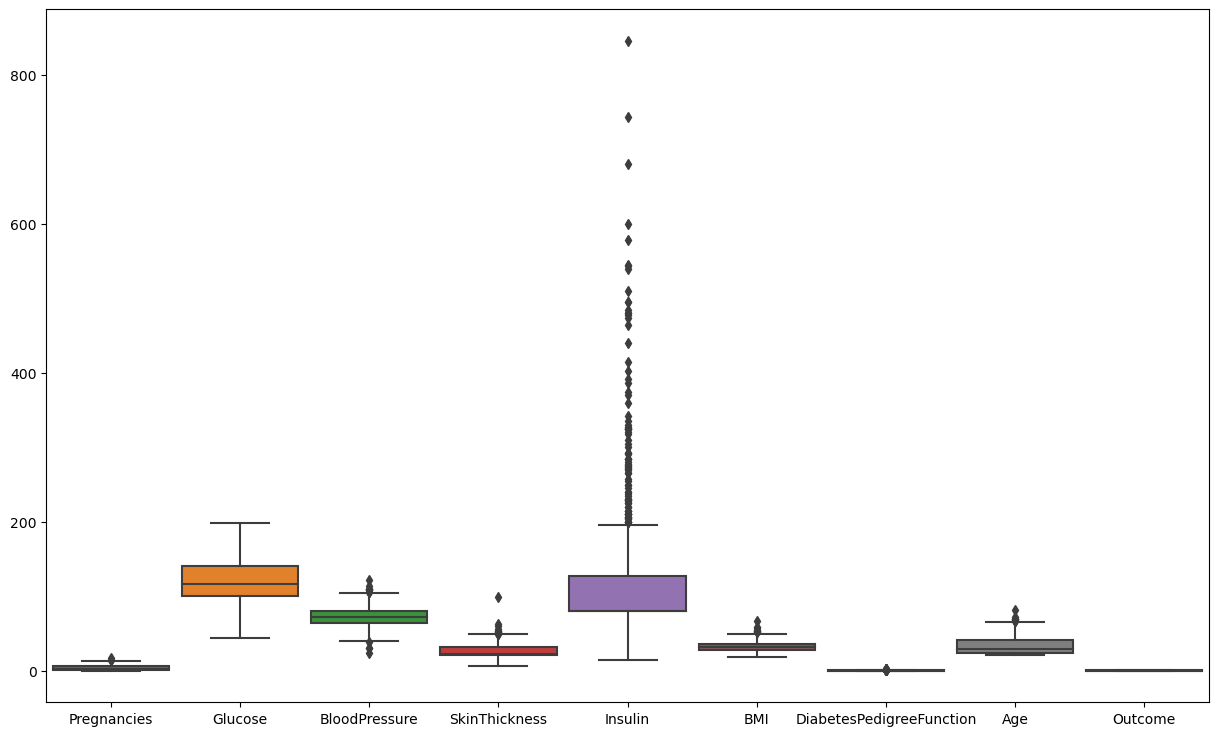

In [11]:
plt.figure(figsize=(15,9))
sns.boxplot(data = df,width = 0.90)

<AxesSubplot: >

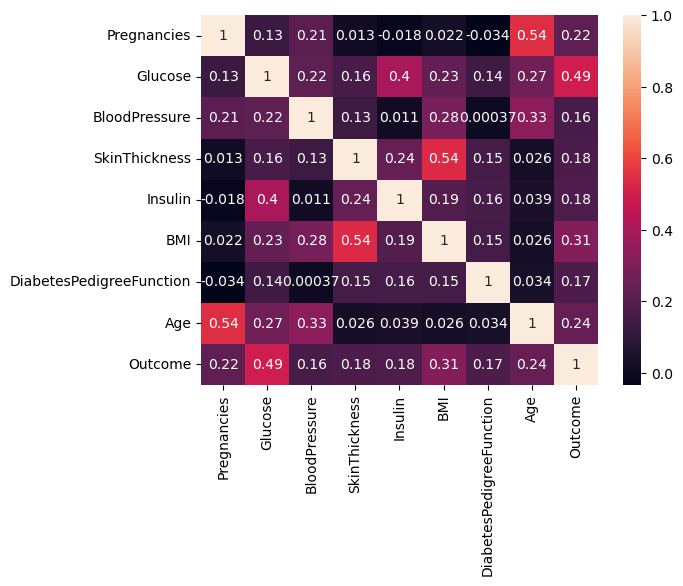

In [12]:
sns.heatmap(df.corr(),annot = True)

In [13]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

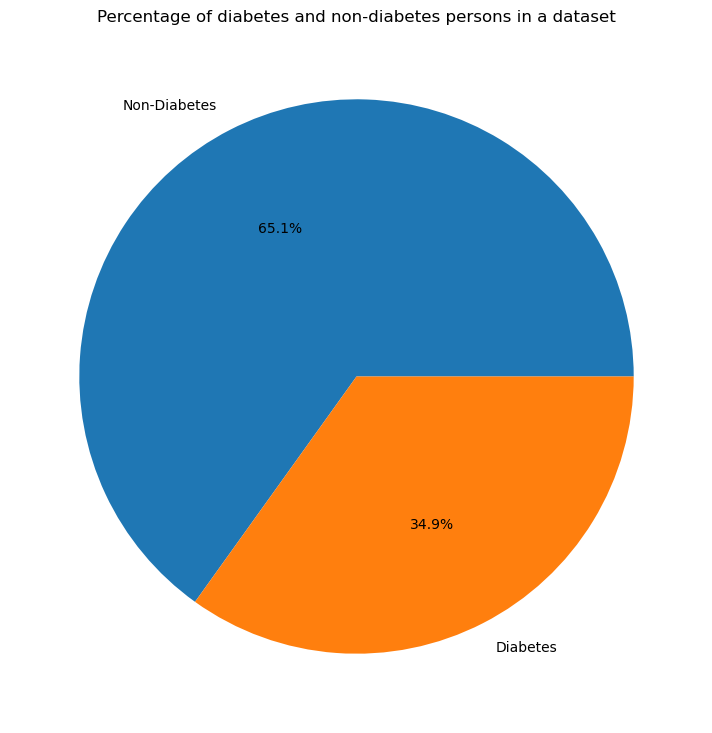

In [14]:
plt.figure(figsize=(15,9))
plt.title("Percentage of diabetes and non-diabetes persons in a dataset")
labels = ["Non-Diabetes","Diabetes"]
x = [((500/768)*100),((268/768)*100)]
plt.pie(x,labels =labels, autopct='%1.1f%%')
plt.show()

In [15]:
#Independent and dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Train_test_split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(514, 8)
(254, 8)
(514,)
(254,)


# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
regressor = LogisticRegression()
regressor.fit(x_train_scaled,y_train)

LogisticRegression()

In [21]:
y_pred = regressor.predict(x_test_scaled)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7677165354330708
[[146  38]
 [ 21  49]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       184
           1       0.56      0.70      0.62        70

    accuracy                           0.77       254
   macro avg       0.72      0.75      0.73       254
weighted avg       0.79      0.77      0.77       254



In [22]:
# Hyperparameter tuning
parameters= {
   'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [1,10,20],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    }

In [23]:
from sklearn.model_selection import GridSearchCV
regressor = LogisticRegression()
regressor_cv = GridSearchCV(regressor,param_grid=parameters,cv=5,scoring='accuracy')
regressor_cv.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [24]:
regressor_cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
regressor1 = LogisticRegression(C = 1,penalty='l1',solver='liblinear')
regressor1.fit(x_train_scaled,y_train)
y_pred1 = regressor1.predict(x_test_scaled)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

0.7637795275590551
[[145  38]
 [ 22  49]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       183
           1       0.56      0.69      0.62        71

    accuracy                           0.76       254
   macro avg       0.72      0.74      0.72       254
weighted avg       0.78      0.76      0.77       254



In [26]:
from sklearn.model_selection import RandomizedSearchCV
regressor_cv1 = RandomizedSearchCV(regressor,param_distributions=parameters,cv=10,scoring='accuracy',verbose = 3)
regressor_cv1.fit(x_train_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .....C=20, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/10] END .....C=20, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/10] END .....C=20, penalty=l2, solver=sag;, score=0.769 total time=   0.0s
[CV 4/10] END .....C=20, penalty=l2, solver=sag;, score=0.808 total time=   0.0s
[CV 5/10] END .....C=20, penalty=l2, solver=sag;, score=0.667 total time=   0.0s
[CV 6/10] END .....C=20, penalty=l2, solver=sag;, score=0.745 total time=   0.0s
[CV 7/10] END .....C=20, penalty=l2, solver=sag;, score=0.627 total time=   0.0s
[CV 8/10] END .....C=20, penalty=l2, solver=sag;, score=0.882 total time=   0.0s
[CV 9/10] END .....C=20, penalty=l2, solver=sag;, score=0.824 total time=   0.0s
[CV 10/10] END ....C=20, penalty=l2, solver=sag;, score=0.902 total time=   0.0s
[CV 1/10] END C=20, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=20, penalty=elasticnet, sol

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy', verbose=3)

In [27]:
regressor_cv1.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 20}

In [40]:
regressor2 = LogisticRegression(C = 20,penalty='l2',solver='sag')
regressor2.fit(x_train_scaled,y_train)
y_pred2 = regressor2.predict(x_test_scaled)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

0.7677165354330708
[[146  38]
 [ 21  49]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       184
           1       0.56      0.70      0.62        70

    accuracy                           0.77       254
   macro avg       0.72      0.75      0.73       254
weighted avg       0.79      0.77      0.77       254



# Logistic Regression Accuracy is : 76.77%

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = classifier.predict(x_test_scaled)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7165354330708661
[[129  34]
 [ 38  53]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       163
           1       0.61      0.58      0.60        91

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.71      0.72      0.72       254



In [31]:
parameters1 = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
    }

In [32]:
classifier1 = GridSearchCV(classifier,param_grid=parameters1,cv=10,scoring='accuracy')
classifier1.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
classifier1.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [42]:
classifier = DecisionTreeClassifier(criterion = 'gini',max_depth = 4,max_features = 'log2',splitter = 'best')
classifier.fit(x_train_scaled,y_train)
y_pred1 = classifier.predict(x_test_scaled)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

0.7204724409448819
[[137  41]
 [ 30  46]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       178
           1       0.53      0.61      0.56        76

    accuracy                           0.72       254
   macro avg       0.67      0.69      0.68       254
weighted avg       0.73      0.72      0.73       254



In [35]:
classifier2 = RandomizedSearchCV(classifier,param_distributions=parameters1,cv=10,scoring='accuracy',verbose=3)
classifier2.fit(x_train_scaled,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.769 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.769 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.712 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.647 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.784 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.608 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.686 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=sqrt, spl

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    max_features='log2'),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=3)

In [36]:
classifier2.best_params_

{'splitter': 'best',
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'log_loss'}

In [43]:
classifier = DecisionTreeClassifier(criterion = 'log_loss',max_depth = 5,max_features = 'auto',splitter = 'best')
classifier.fit(x_train_scaled,y_train)
y_pred2 = classifier.predict(x_test_scaled)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

0.7480314960629921
[[144  41]
 [ 23  46]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       185
           1       0.53      0.67      0.59        69

    accuracy                           0.75       254
   macro avg       0.70      0.72      0.70       254
weighted avg       0.77      0.75      0.76       254



# Decision Tree Classifier Accuracy is : 74.80%